# Olympic Analytics Engine Using Python & Machine Learning - PROJECT

In [127]:
# Data handling
import pandas as pd
import numpy as np

In [128]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans

In [130]:
athletes = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

df = athletes.merge(regions, on="NOC", how="left")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [131]:
df.rename(columns={'Name': 'Athlete'}, inplace=True)

In [132]:
# Preview the first 5 rows of the main dataset
print("First 5 rows of athlete_events")
display(df.head())

First 5 rows of athlete_events


,ID,Athlete,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [133]:
# Preview the last 5 rows of the main dataset
print("Last 5 rows of athlete_events")
display(df.tail())

Last 5 rows of athlete_events


,ID,Athlete,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [134]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [135]:
df.shape

(271116, 17)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       271116 non-null  int64  
 1   Athlete  271116 non-null  object 
 2   Sex      271116 non-null  object 
 3   Age      261642 non-null  float64
 4   Height   210945 non-null  float64
 5   Weight   208241 non-null  float64
 6   Team     271116 non-null  object 
 7   NOC      271116 non-null  object 
 8   Games    271116 non-null  object 
 9   Year     271116 non-null  int64  
 10  Season   271116 non-null  object 
 11  City     271116 non-null  object 
 12  Sport    271116 non-null  object 
 13  Event    271116 non-null  object 
 14  Medal    39783 non-null   object 
 15  region   270746 non-null  object 
 16  notes    5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [137]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### DATA CLEANING

In [138]:
# Remove rows with missing physical attributes
df = df.dropna(subset=['Age', 'Height', 'Weight'])

# Fill missing regions
df['region'] = df['region'].fillna('Unknown')

df.isnull().sum()

ID              0
Athlete         0
Sex             0
Age             0
Height          0
Weight          0
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal      175984
region          0
notes      202672
dtype: int64

### FEATURE ENGINEERING

In [139]:
# Creating target variable with ML

In [140]:
df['Medal_Won'] = df['Medal'].apply(lambda x: 0 if pd.isna(x) else 1)
df[['Medal', 'Medal_Won']].head(10)

,Medal,Medal_Won
0,NaN,0
1,NaN,0
4,NaN,0
5,NaN,0
6,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0
10,NaN,0
11,NaN,0


### EDA

In [141]:
df['Medal_Won'].value_counts()

Medal_Won
0    175984
1     30181
Name: count, dtype: int64

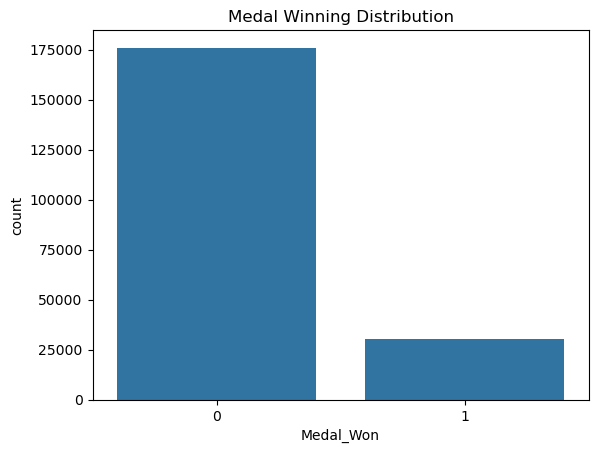

In [142]:
sns.countplot(x='Medal_Won', data=df)
plt.title("Medal Winning Distribution")
plt.show()

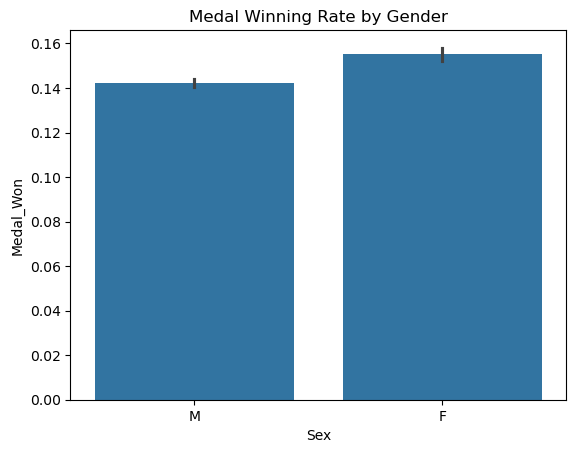

In [143]:
sns.barplot(x='Sex', y='Medal_Won', data=df)
plt.title("Medal Winning Rate by Gender")
plt.show()

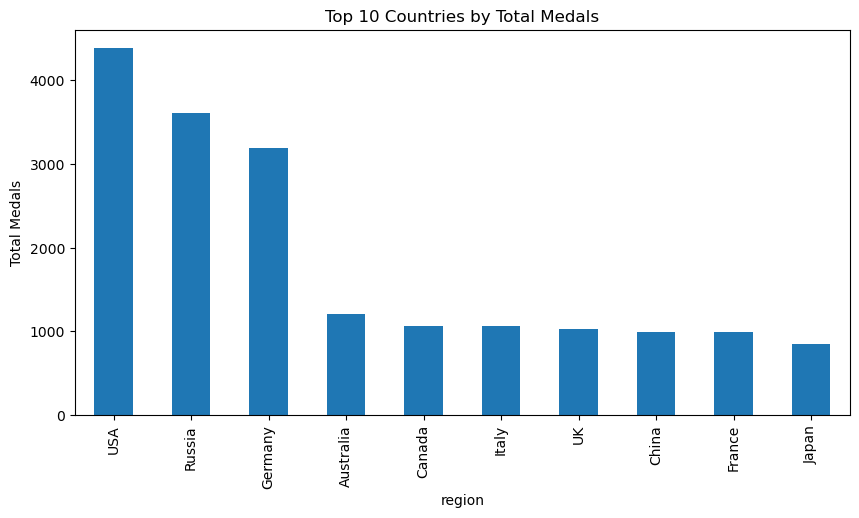

In [144]:
top_countries = df.groupby('region')['Medal_Won'].sum().sort_values(ascending=False).head(10)

top_countries.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Countries by Total Medals")
plt.ylabel("Total Medals")
plt.show()

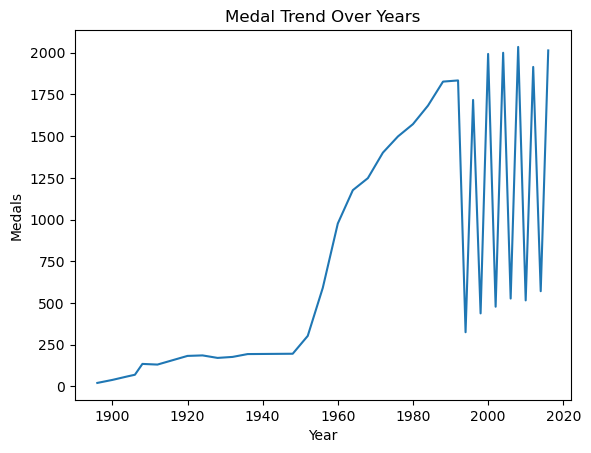

In [145]:
yearly_medals = df.groupby('Year')['Medal_Won'].sum()

plt.plot(yearly_medals.index, yearly_medals.values)
plt.title("Medal Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Medals")
plt.show()

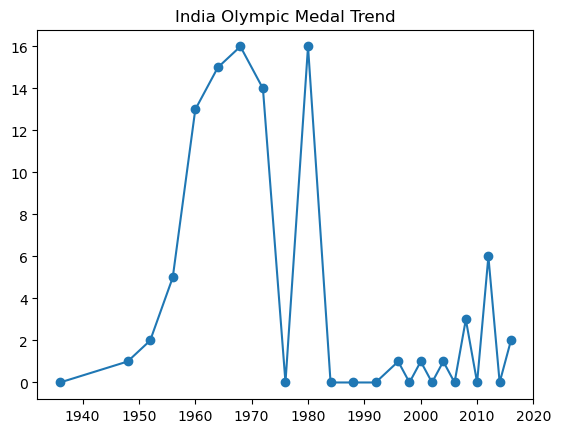

In [146]:
india = df[df['region'] == 'India'].groupby('Year')['Medal_Won'].sum()

plt.plot(india.index, india.values, marker='o')
plt.title("India Olympic Medal Trend")
plt.show()

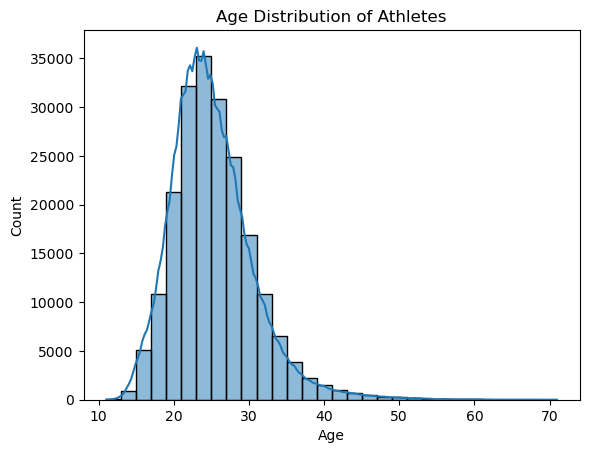

In [147]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Athletes")
plt.show()

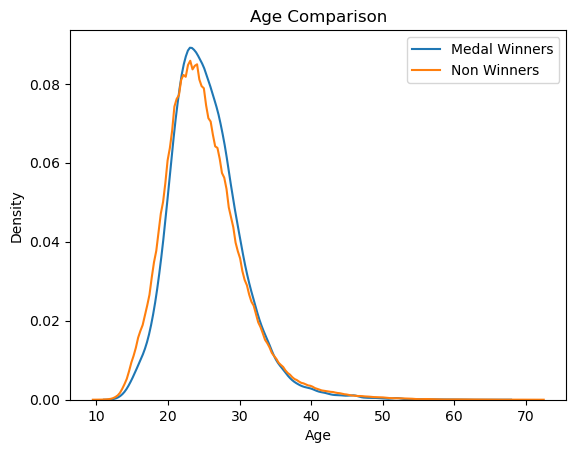

In [148]:
sns.kdeplot(df[df['Medal_Won']==1]['Age'], label="Medal Winners")
sns.kdeplot(df[df['Medal_Won']==0]['Age'], label="Non Winners")
plt.legend()
plt.title("Age Comparison")
plt.show()

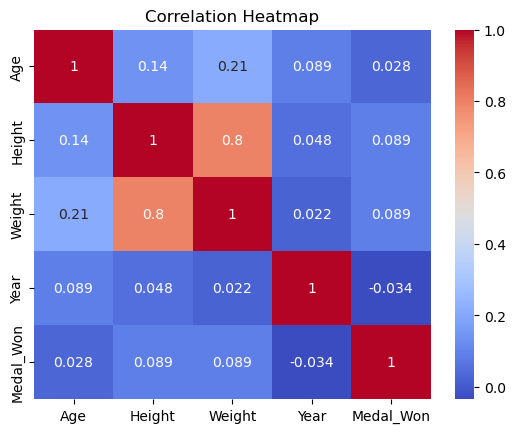

In [149]:
model_corr = df[['Age','Height','Weight','Year','Medal_Won']].corr()

sns.heatmap(model_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [166]:
ml_df = df[['Sex','Age','Height','Weight','Sport','Year','region','Medal_Won']]

le = LabelEncoder()
for col in ['Sex','Sport','region']:
    ml_df[col] = le.fit_transform(ml_df[col])

In [167]:
X = ml_df.drop('Medal_Won', axis=1)
y = ml_df['Medal_Won']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### scaling

In [168]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [169]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

0.8535638929983266
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     35197
           1       0.38      0.00      0.00      6036

    accuracy                           0.85     41233
   macro avg       0.61      0.50      0.46     41233
weighted avg       0.78      0.85      0.79     41233



### Random Forest Classifier

In [170]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))

0.8598452695656392


### Confusion Matrix

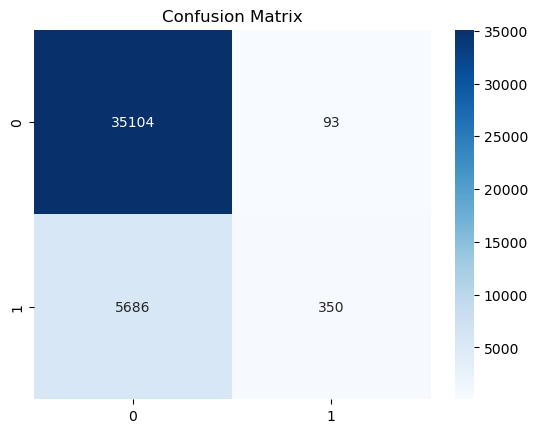

In [173]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [172]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
6,region,0.304594
4,Sport,0.243867
5,Year,0.133471
3,Weight,0.113853
2,Height,0.095235
1,Age,0.065509
0,Sex,0.043471


In [174]:
country_medals = df[df['Medal_Won']==1].groupby(['region','Year']).size().reset_index(name='Total_Medals')

### Regression features

In [175]:
country_features = df.groupby(['region','Year']).agg({
    'Age':'mean',
    'Height':'mean',
    'Weight':'mean',
    'ID':'count'
}).reset_index()

country_features.rename(columns={'ID':'Athlete_Count'}, inplace=True)

reg_df = country_features.merge(country_medals, on=['region','Year'], how='left').fillna(0)

### Regression model

In [176]:
reg_df['region'] = le.fit_transform(reg_df['region'])

X = reg_df.drop('Total_Medals', axis=1)
y = reg_df['Total_Medals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 4.748725490196079
R2: 0.8104577409314941


### clustering

In [177]:
cluster_df = df.groupby('region').agg({
    'Medal_Won':'sum',
    'ID':'count',
    'Age':'mean'
}).reset_index()

cluster_df.rename(columns={
    'Medal_Won':'Total_Medals',
    'ID':'Total_Athletes'
}, inplace=True)

### K-Means clustering

In [178]:
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_df[['Total_Medals','Total_Athletes','Age']])

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(scaled)

### cluster visualization

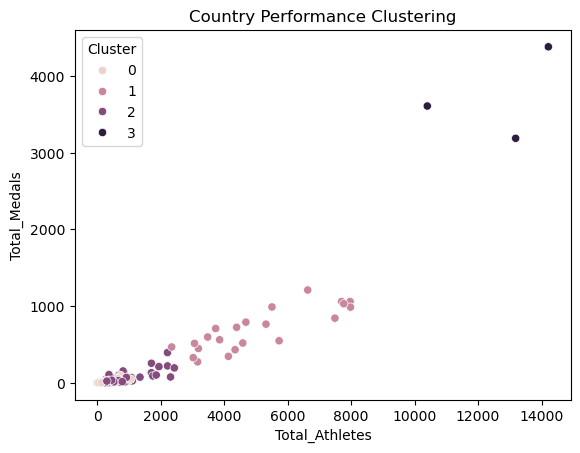

In [179]:
sns.scatterplot(
    x='Total_Athletes',
    y='Total_Medals',
    hue='Cluster',
    data=cluster_df
)
plt.title("Country Performance Clustering")
plt.show()

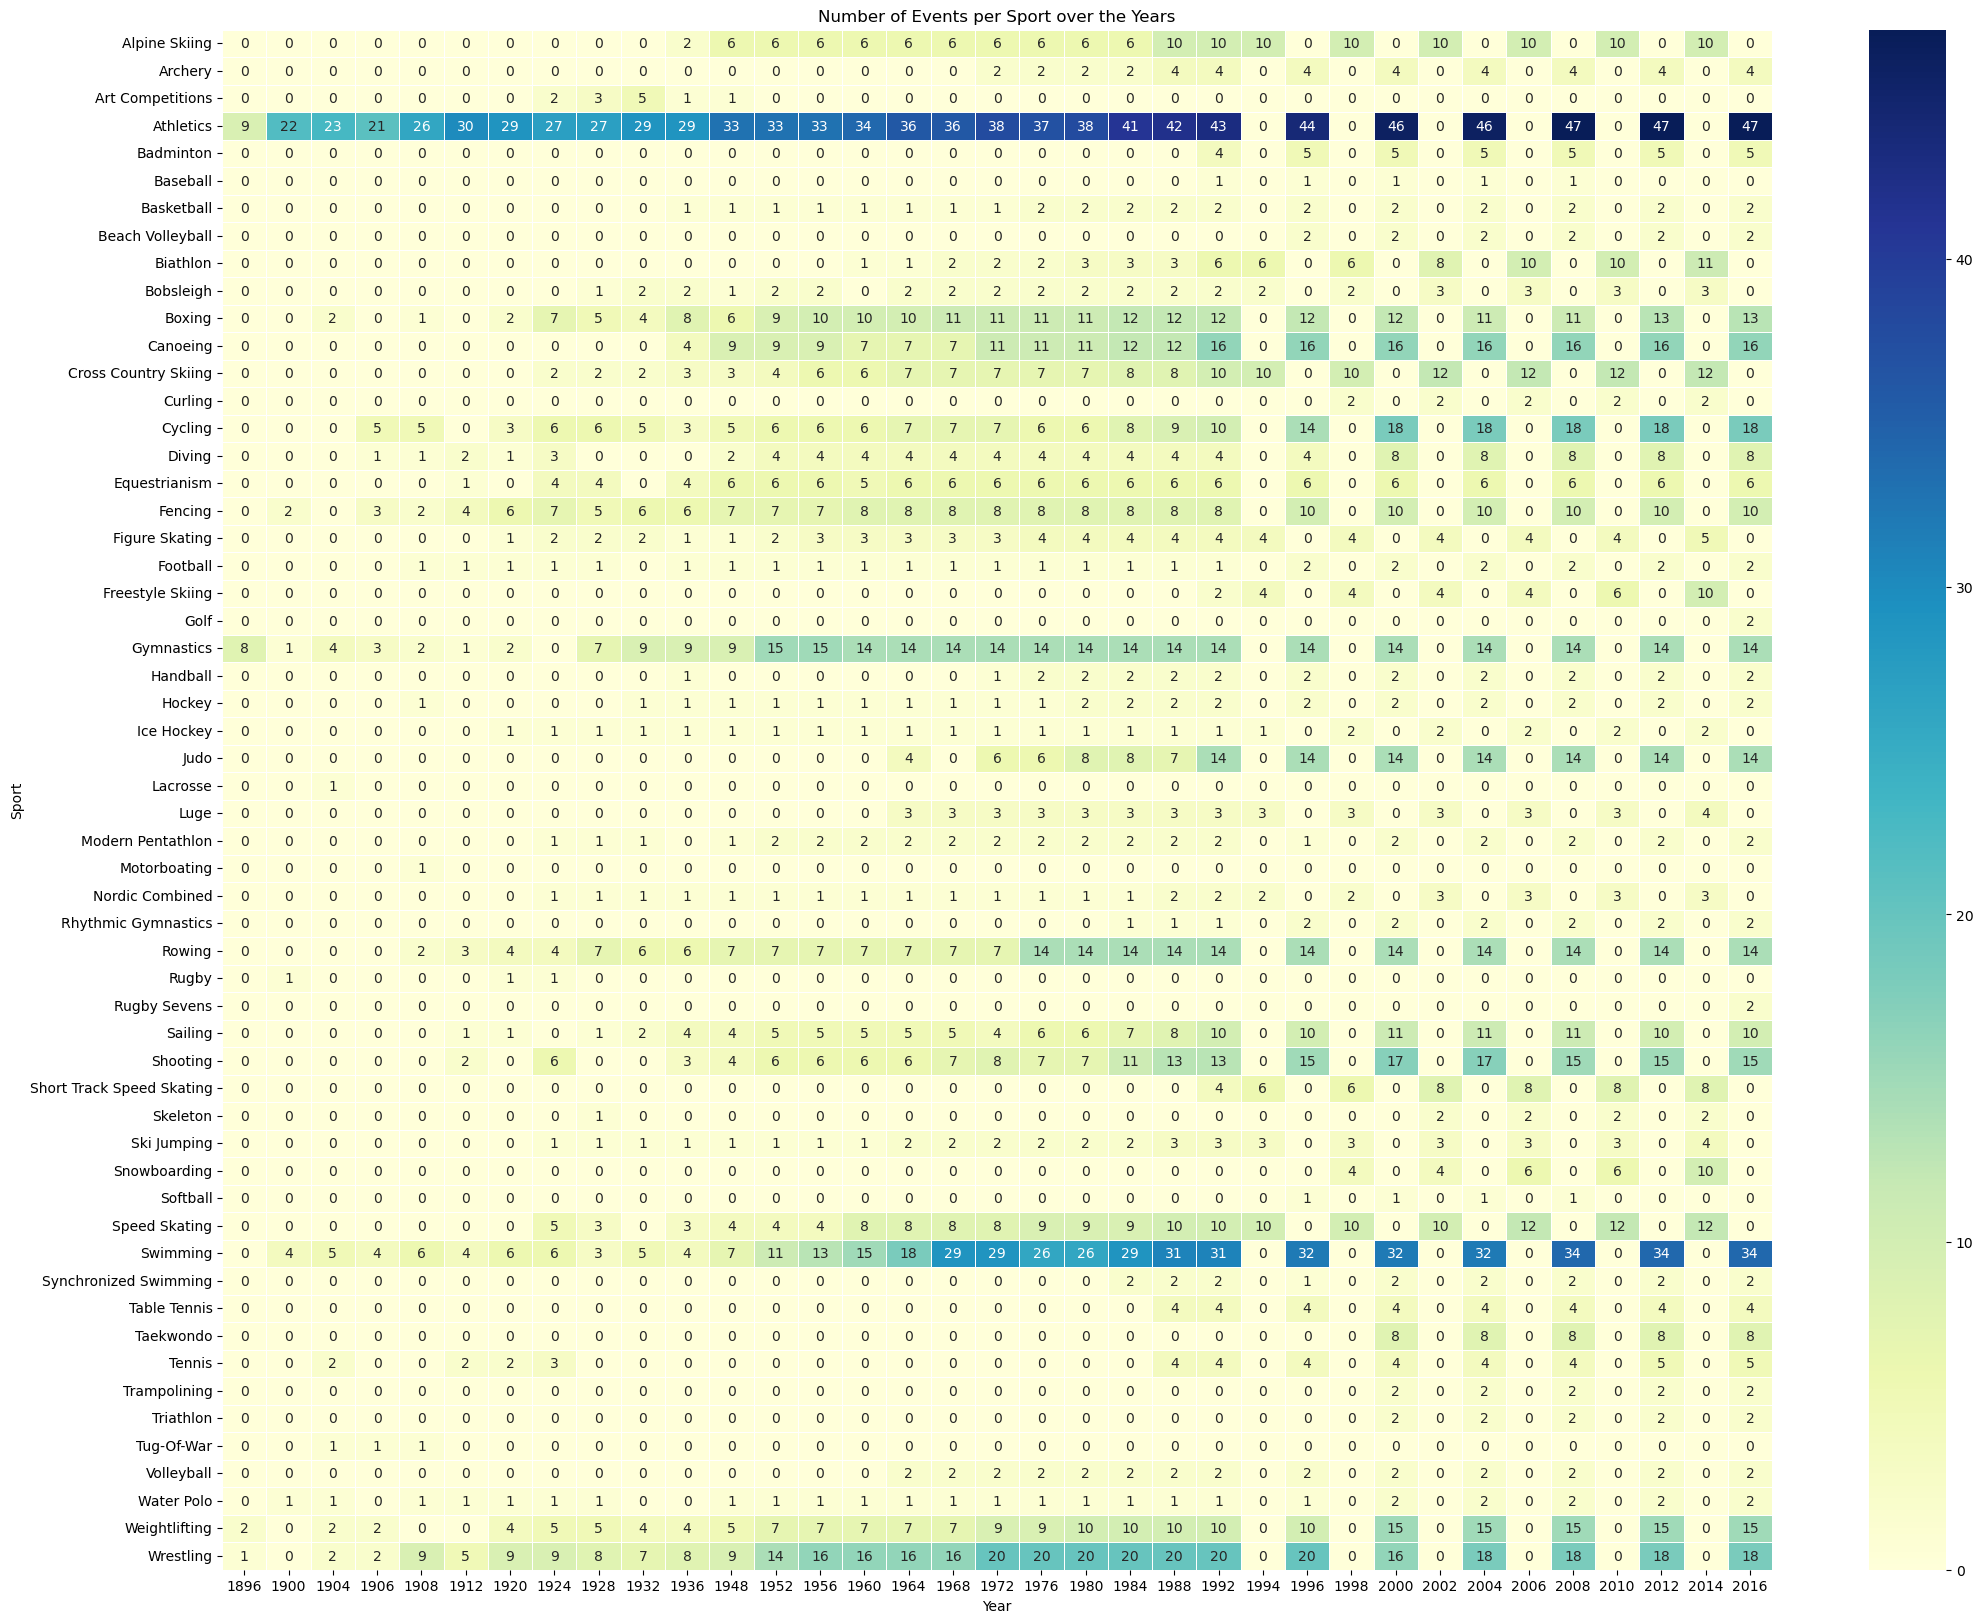

In [180]:
# --- Heatmap: Number of Events per Sport over Years ---
event_matrix = (
    df.drop_duplicates(['Year', 'Sport', 'Event'])
    .pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count')
    .fillna(0)
    .astype(int)
)

plt.figure(figsize=(25, 20))
sns.heatmap(event_matrix, annot=True, linewidths=.5, cmap="YlGnBu")
plt.title('Number of Events per Sport over the Years')
plt.show()

# Most successful athlets in olympics

In [164]:
# Keep only athletes who won at least one medal
medal_df = df.dropna(subset=['Medal'])

print("Total medal-winning records:", medal_df.shape)

Total medal-winning records: (30181, 18)


In [181]:
medal_df = medal_df.drop_duplicates(
    subset=['Athlete', 'Sport', 'Event', 'Year', 'Medal']
)

print("After removing duplicates:", medal_df.shape)

After removing duplicates: (30177, 18)


### Top 10 successful athlets

In [184]:
top_athletes = (
    medal_df['Athlete']
    .value_counts()
    .reset_index()
)

top_athletes.columns = ['Athlete', 'Total_Medals']

top_athletes.head(10)

,Athlete,Total_Medals
0,"Michael Fred Phelps, II",28
1,Larysa Semenivna Latynina (Diriy-),18
2,Nikolay Yefimovich Andrianov,15
3,Takashi Ono,13
4,Borys Anfiyanovych Shakhlin,13
5,Ole Einar Bjrndalen,13
6,Natalie Anne Coughlin (-Hall),12
7,Aleksey Yuryevich Nemov,12
8,Paavo Johannes Nurmi,12
9,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12


In [186]:
top_athletes_details = (
    top_athletes
    .head(10)
    .merge(df, left_on='Athlete', right_on='Athlete', how='left')
    [['Athlete', 'Total_Medals', 'Sport', 'region']]
    .drop_duplicates('Athlete')
)

top_athletes_details

,Athlete,Total_Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Takashi Ono,13,Gymnastics,Japan
106,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
130,Ole Einar Bjrndalen,13,Biathlon,Norway
157,Natalie Anne Coughlin (-Hall),12,Swimming,USA
169,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
190,Paavo Johannes Nurmi,12,Athletics,Finland
202,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA


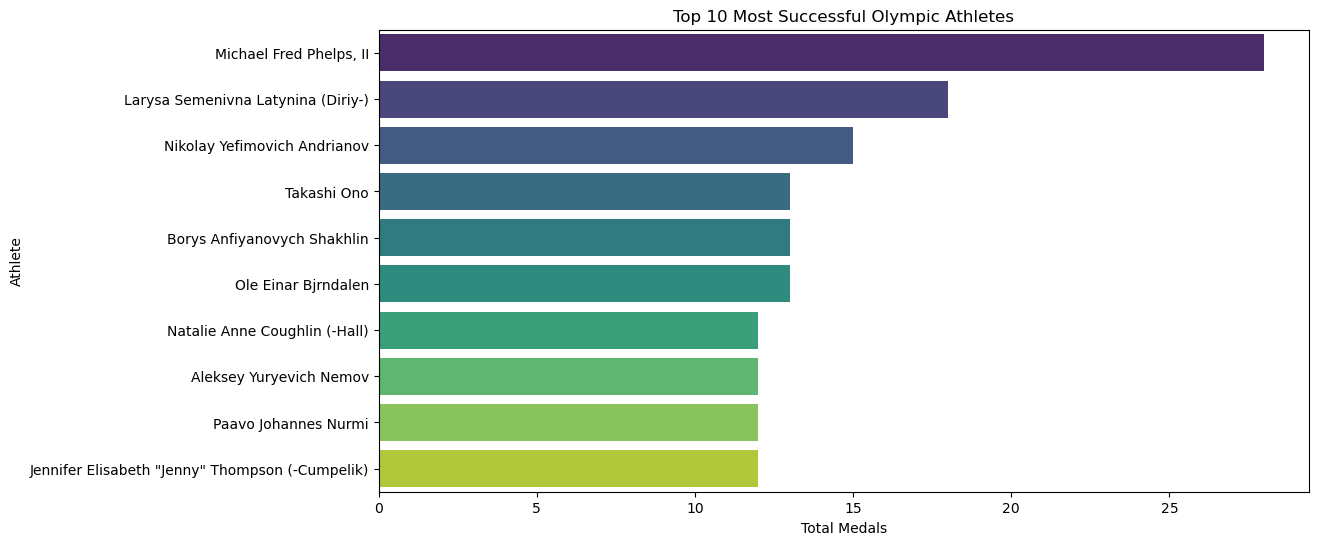

In [187]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_athletes_details,
    x='Total_Medals',
    y='Athlete',
    palette='viridis'
)
plt.title("Top 10 Most Successful Olympic Athletes")
plt.xlabel("Total Medals")
plt.ylabel("Athlete")
plt.show()

### Medal Breakdown (Gold, sliver, bronze)

In [189]:
athlete_medals = (
    medal_df.groupby(['Athlete', 'Medal'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

athlete_medals['Total'] = (
    athlete_medals.get('Gold', 0) +
    athlete_medals.get('Silver', 0) +
    athlete_medals.get('Bronze', 0)
)

athlete_medals.sort_values('Total', ascending=False).head(10)

Medal,Athlete,Bronze,Gold,Silver,Total
12842,"Michael Fred Phelps, II",2,23,3,28
10631,Larysa Semenivna Latynina (Diriy-),4,9,5,18
13905,Nikolay Yefimovich Andrianov,3,7,5,15
14126,Ole Einar Bjrndalen,1,8,4,13
17717,Takashi Ono,4,5,4,13
2307,Borys Anfiyanovych Shakhlin,2,7,4,13
13550,Natalie Anne Coughlin (-Hall),5,3,4,12
511,Aleksey Yuryevich Nemov,6,4,2,12
8371,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",1,8,3,12
14431,Paavo Johannes Nurmi,0,9,3,12


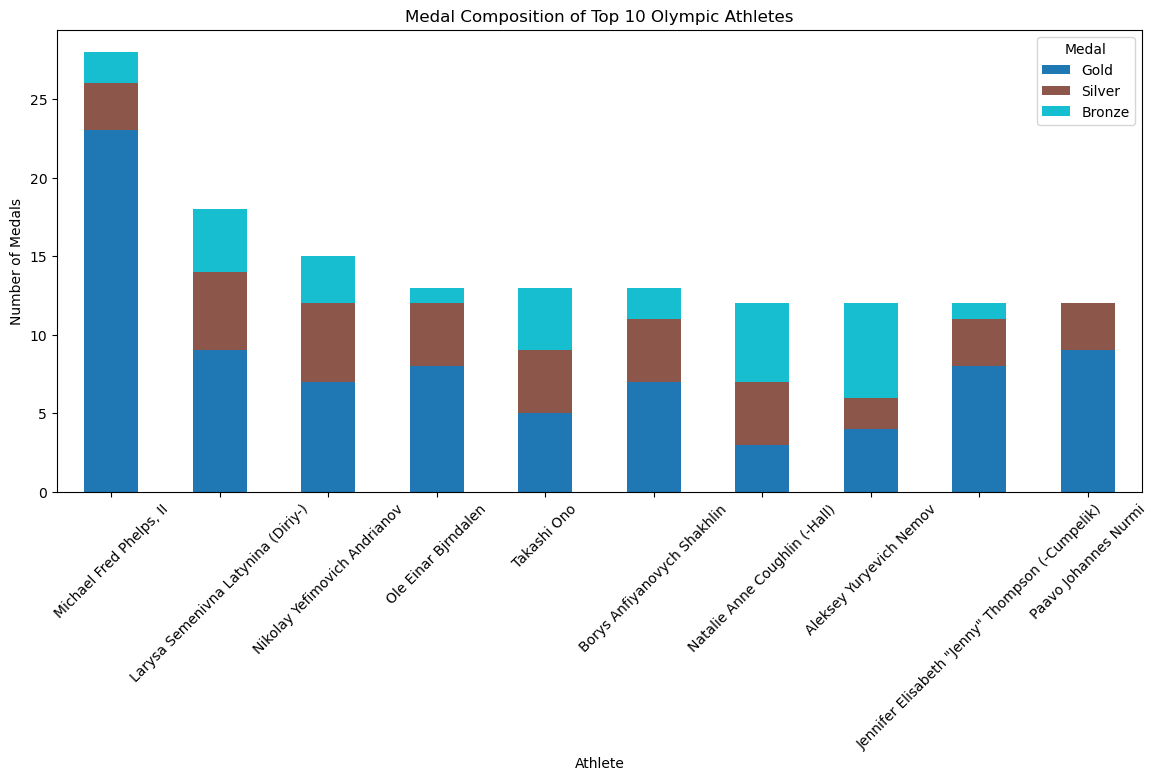

In [190]:
top10 = athlete_medals.sort_values('Total', ascending=False).head(10)

top10.set_index('Athlete')[['Gold','Silver','Bronze']].plot(
    kind='bar',
    stacked=True,
    figsize=(14,6),
    colormap='tab10'
)

plt.title("Medal Composition of Top 10 Olympic Athletes")
plt.xlabel("Athlete")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45)
plt.show()

### successful Athlets by sports

In [191]:
def most_successful_by_sport(sport_name, top_n=10):
    temp = medal_df[medal_df['Sport'] == sport_name]
    
    result = (
        temp['Athlete']
        .value_counts()
        .head(top_n)
        .reset_index()
    )
    
    result.columns = ['Athlete', 'Total_Medals']
    return result

In [192]:
# example "Swimming"
most_successful_by_sport('Swimming')

,Athlete,Total_Medals
0,"Michael Fred Phelps, II",28
1,"Dara Grace Torres (-Hoffman, -Minas)",12
2,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
3,Ryan Steven Lochte,12
4,Natalie Anne Coughlin (-Hall),12
5,"Matthew Nicholas ""Matt"" Biondi",11
6,Mark Andrew Spitz,11
7,"Gary Wayne Hall, Jr.",10
8,Franziska van Almsick,10
9,Aleksandr Vladimirovich Popov,9


### Successful Athlets By Country

In [193]:
def most_successful_by_country(country, top_n=10):
    temp = medal_df[medal_df['region'] == country]
    
    result = (
        temp['Athlete']
        .value_counts()
        .head(top_n)
        .reset_index()
    )
    
    result.columns = ['Athlete', 'Total_Medals']
    return result

In [194]:
# example "USA"
most_successful_by_country('USA')

,Athlete,Total_Medals
0,"Michael Fred Phelps, II",28
1,Ryan Steven Lochte,12
2,Natalie Anne Coughlin (-Hall),12
3,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
4,"Dara Grace Torres (-Hoffman, -Minas)",12
5,Mark Andrew Spitz,11
6,"Matthew Nicholas ""Matt"" Biondi",11
7,"Raymond Clarence ""Ray"" Ewry",10
8,"Gary Wayne Hall, Jr.",10
9,"Frederick Carlton ""Carl"" Lewis",10


### Age Distribution of Top Athlets

In [195]:
print(age_df.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Medal_Won'],
      dtype='object')


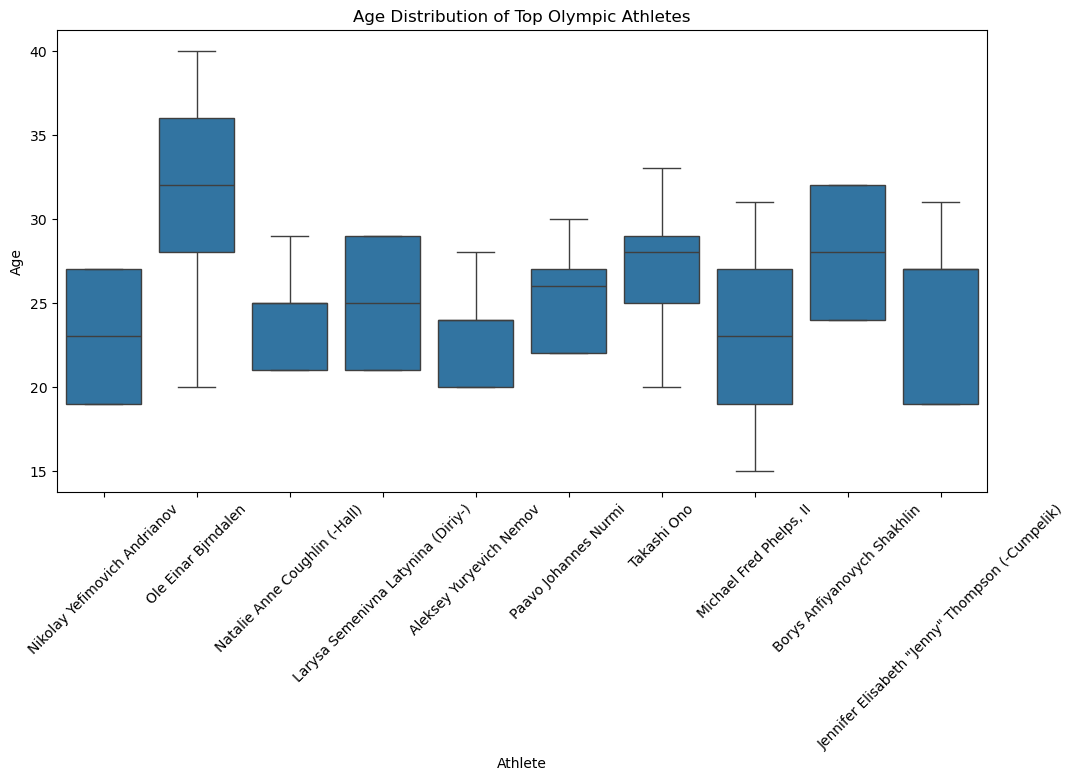

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows for top athletes
age_df = df[df['Athlete'].isin(top_athlete_names)]

plt.figure(figsize=(12,6))
sns.boxplot(data=age_df, x='Athlete', y='Age')
plt.title("Age Distribution of Top Olympic Athletes")
plt.xticks(rotation=45)
plt.show()

### violin plot

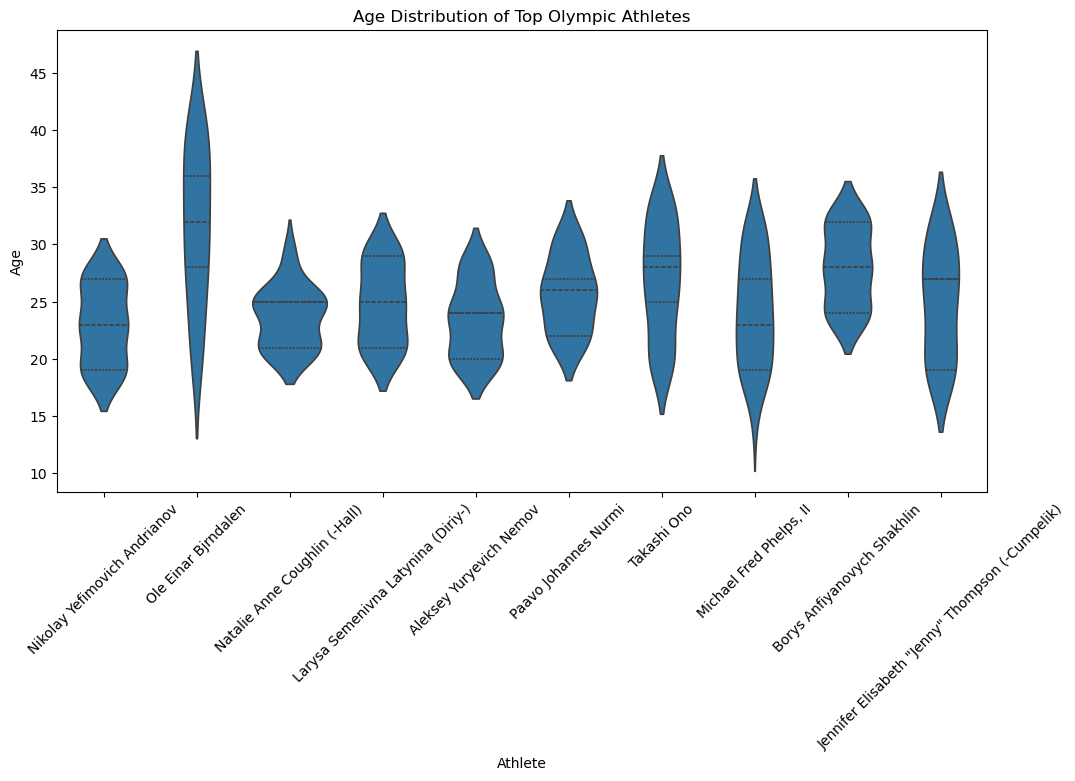

In [197]:
plt.figure(figsize=(12,6))
sns.violinplot(data=age_df, x='Athlete', y='Age', inner='quartile')
plt.title("Age Distribution of Top Olympic Athletes")
plt.xticks(rotation=45)
plt.show()